In [175]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib as mpl

In [176]:
dataset_names = ['CARACOLES', 'BEEFUN', 'DIG_13', 'DIG_50', 'LPI_2858']
color_palette = ['#ff595e', '#ffca3a', '#8ac926', '#1982c4', '#6a4c93']
markers = ['o', 'v', 'x', 's', '+', 'p']

### Figure 4: Ratio between positive/negative, size vs. P (CARACOLES and other)

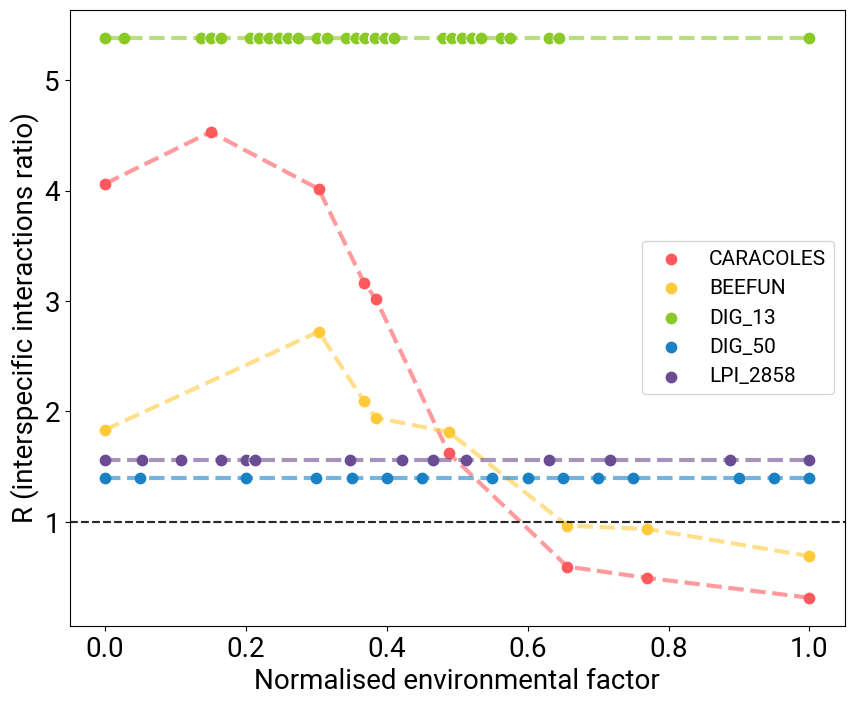

In [177]:
dataset_names = ['CARACOLES', 'BEEFUN', 'DIG_13', 'DIG_50', 'LPI_2858']
color_palette = ['#ff595e', '#ffca3a', '#8ac926', '#1982c4', '#6a4c93']
markers = ['o', 'v', 'x', 's', 'D']
plt.style.use('default')
# Cambiar tipografía globalmente
mpl.rcParams['font.family'] = 'Roboto'  # Puedes probar con 'Arial', 'Times New Roman', etc.
mpl.rcParams['font.size'] = 12         # Opcional: tamaño base

plt.figure(figsize=(10,8))
for i, dataset in enumerate(dataset_names):
    df = pd.read_csv(f'ratio_{dataset}.csv')
    df = df.drop(columns='Unnamed: 0')
    df = df.sort_values(by='norm_env_factor')
    pos_neg_ratio = df['pos_neg_ratio'].to_numpy()
    env_factor = df['norm_env_factor'].to_numpy()

    #Plot
    plt.axhline(1, ls='--', color='black', alpha=0.3)
    plt.xlabel('Normalised environmental factor', fontsize=20)
    plt.ylabel('R (interspecific interactions ratio)', fontsize=20)
    plt.tick_params(labelsize=20)
    #plt.yscale('log')
    #plt.grid(lw=0.3)
    plt.plot(env_factor, pos_neg_ratio, color=color_palette[i], ls='--', markersize=10, lw=3, alpha=0.6)
    plt.scatter(env_factor, pos_neg_ratio, edgecolors='white', s=90, color=color_palette[i],label=f'{dataset_names[i]}')
    plt.legend(loc='center right', fontsize=15)
    #sns.despine()



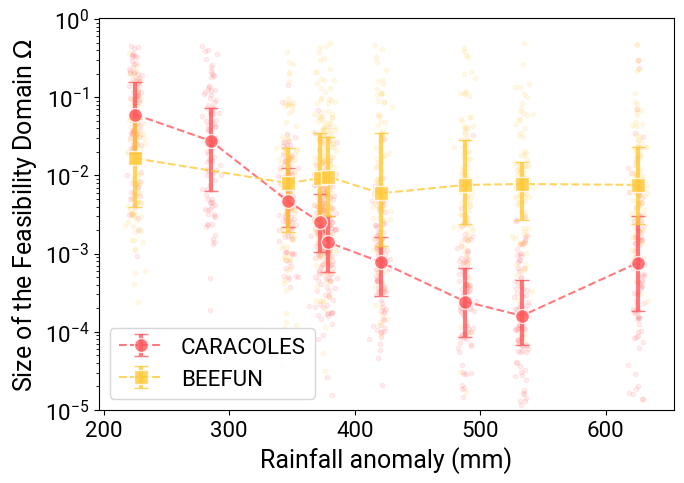

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


    
dataset_names = ['CARACOLES', 'BEEFUN']
markers = ['o', 's']
color_palette = ['#ff595e', '#ffca3a', '#8ac926', '#1982c4', '#6a4c93']

fig, ax = plt.subplots(figsize=(7, 5))

for i, dataset in enumerate(dataset_names):
    df = pd.read_csv(f'erroprop_{dataset}.csv')
    df = df.drop(columns='Unnamed: 0')

    # Puntos con jitter
    for replica_id, group in df.groupby('replica'):
        jitter = np.random.normal(loc=0, scale=3, size=len(group))
        ax.scatter(group['env'] + jitter, group['value'],
                   color=color_palette[i], alpha=0.1, s=10)

    # Calcular estadísticos por ambiente
    stats_df = df.groupby("env")["value"].agg(
    median='median',
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75)
    ).reset_index()
    # Calcular errores (forzar valores no negativos)
    lower_err = np.maximum(stats_df['median'] - stats_df['q1'], 0)
    upper_err = np.maximum(stats_df['q3'] - stats_df['median'], 0)

    #Graficar con barras de error asimétricas
    ax.errorbar(stats_df['env'], stats_df['median'],
            yerr=[lower_err, upper_err],
            fmt=markers[i], color=color_palette[i],
            ecolor=color_palette[i], elinewidth=3, capsize=5,
            markersize=10, label=f'{dataset}', linestyle='--', alpha=0.8,
            markeredgecolor='white')


# Ejes y estilo
ax.set_xlabel('Rainfall anomaly (mm)', fontsize=18)
ax.set_ylabel('Size of the Feasibility Domain $\Omega$', fontsize=18)
ax.set_yscale('log')
ax.set_ylim(bottom=1e-5)
ax.tick_params(labelsize=16)

ax.legend(fontsize=16)
plt.tight_layout()
plt.show()


### Figure 5: Correlations in N* vs. P and j vs. P

IndexError: list index out of range

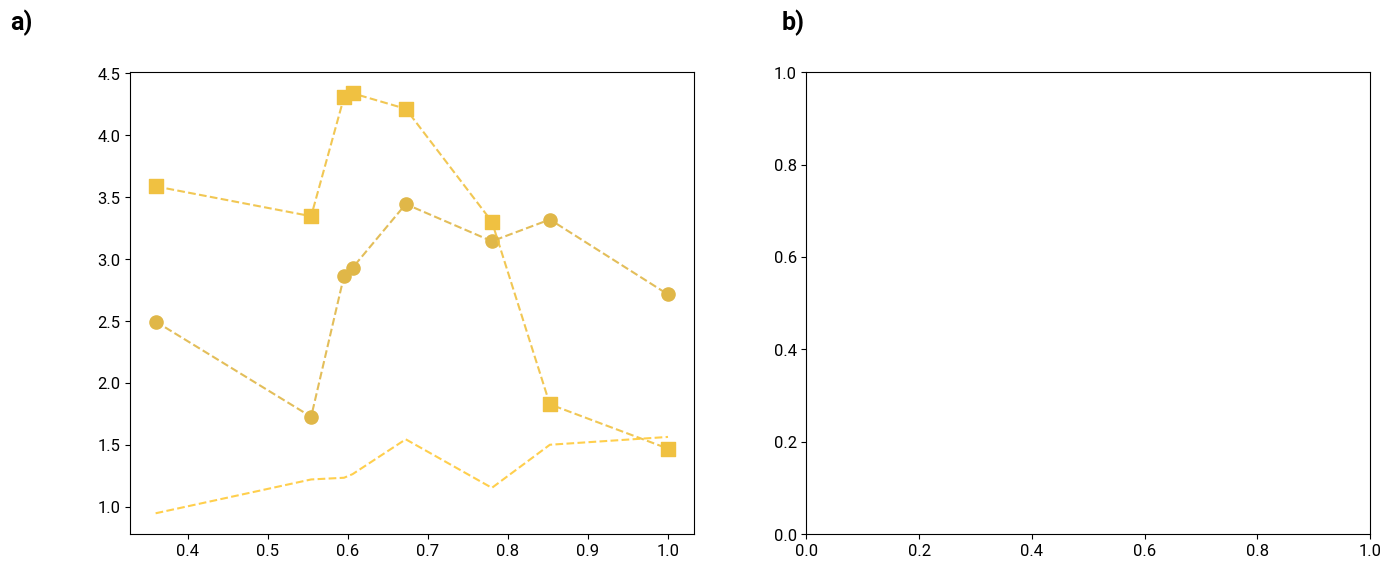

In [179]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# === Crear gradientes personalizados ===
bee_cmap = LinearSegmentedColormap.from_list(
    'bee_gradient', ['#E0B748', '#ffca3a', '#b88d00'], N=5
)
lizard_cmap = LinearSegmentedColormap.from_list(
    'lizard_gradient', ['#BCA1DE', '#6a4c93', '#2e1e4d'], N=6
)

# === Datos ===
datasets = ['BEEFUN', 'LPI2858']
lizard_names = ['Ctenotus schomburgkii', 'Ctenotus leonhardii', 'Ctenotus regius', 
                'Lucasium stenodactylum', 'Rhynchoedura ornata', 'Diplodactylus conspicillatus']
bee_names = ['Bombus terrestris', 'Flavipanurgus venustus', 'Dasypoda cingulata', 'Xylocopa cantabria', 'Lasioglossum immunitum']
n_species = [5, 6]

# === Crear figura ===
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)
axes = axes.flatten()

# Colocar la letra 'A' en la esquina superior izquierda del primer subplot
fig.text(0.05, 0.95, 'a)', fontsize=18, fontweight='bold')  # (x, y) en coordenadas de figura

# Colocar la letra 'B' en la esquina superior izquierda del segundo subplot
fig.text(0.5325, 0.95, 'b)', fontsize=18, fontweight='bold')

for i, name in enumerate(datasets):
    ax = axes[i]
    species_count = n_species[i]
    names_list = bee_names if name == 'BEEFUN' else lizard_names
    cmap = bee_cmap if name == 'BEEFUN' else lizard_cmap

    for j in range(1, species_count + 1):
        df = pd.read_csv(f'correlation_NP_{name}_e{j}.csv', sep=' ')
        df = df.sort_values(by='P')
        N = df['#N'].to_numpy()
        P_scaled = df['P'].to_numpy()
        if name == 'LPI2858' and j == 4:
            P_scaled += 1e-2  # evitar superposición

        color = cmap((j - 1) / (species_count - 1))
        ax.plot(P_scaled, N, ls='--', color=color, alpha=0.9)
        ax.scatter(P_scaled, N, label=f'{names_list[j - 1]}', color=color, s=90, marker=markers[j-1])

    ax.set_title(name, fontsize=18)
    ax.set_xlabel('Rescaled environmental factor, $P/P_{max}$', fontsize=20)
    if i == 0:
        ax.set_ylabel('$N^*_P$', fontsize=20)
    ax.tick_params(labelsize=18)
    ax.legend(prop={'style':'italic','size':16})

plt.tight_layout()
plt.savefig('leo_figure.pdf', dpi=300)
plt.show()


### Supplementary for Leo

IndexError: list index out of range

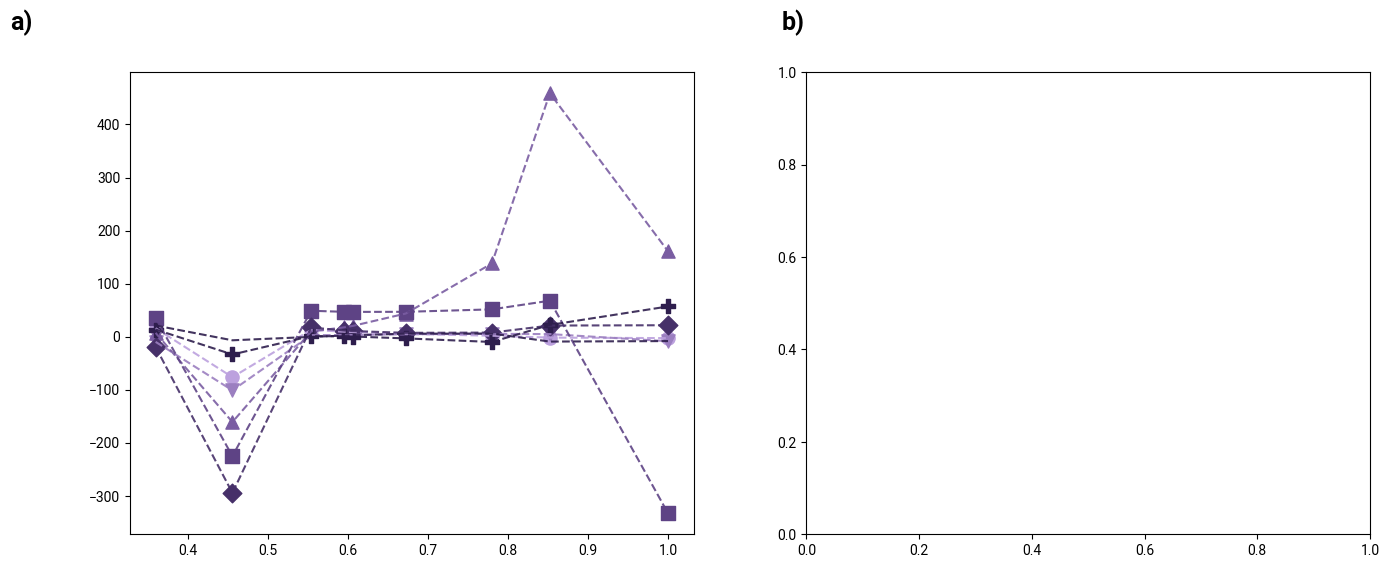

In [174]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# === Crear gradientes personalizados ===
caracoles_cmap = LinearSegmentedColormap.from_list(
    'caracoles_gradient', ['#E08D90', '#ff595e', '#c94e52'], N=7
)
dig13_cmap = LinearSegmentedColormap.from_list(
    'dig50_gradient', ['#5A9FC9', '#1982C4', '#5A9FC9'], N=3
)
dig50_cmap = LinearSegmentedColormap.from_list(
    'dig13_gradient', ['#A4CF60', '#8ac926', '#67A700'], N=3
)

# === Datos ===
datasets = ['CARACOLES', 'DIG13', 'DIG50']
n_species = [7, 3, 3]

# === Crear figura ===
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)
axes = axes.flatten()

# Colocar la letra 'A' en la esquina superior izquierda del primer subplot
fig.text(0.05, 0.95, 'a)', fontsize=18, fontweight='bold')  # (x, y) en coordenadas de figura

# Colocar la letra 'B' en la esquina superior izquierda del segundo subplot
fig.text(0.5325, 0.95, 'b)', fontsize=18, fontweight='bold')

for i, name in enumerate(datasets):
    ax = axes[i]
    species_count = n_species[i]
    names_list = bee_names if name == 'BEEFUN' else lizard_names
    cmap = bee_cmap if name == 'BEEFUN' else lizard_cmap

    for j in range(1, species_count + 1):
        df = pd.read_csv(f'correlation_NP_{name}_e{j}.csv', sep=' ')
        df = df.sort_values(by='P')
        N = df['#N'].to_numpy()
        P_scaled = df['P'].to_numpy()
        if name == 'LPI2858' and j == 4:
            P_scaled += 1e-2  # evitar superposición

        color = cmap((j - 1) / (species_count - 1))
        ax.plot(P_scaled, N, ls='--', color=color, alpha=0.9)
        ax.scatter(P_scaled, N, label=f'{names_list[j - 1]}', color=color, s=90, marker=markers[j-1])

    ax.set_title(name, fontsize=18)
    ax.set_xlabel('Rescaled environmental factor, $P/P_{max}$', fontsize=20)
    if i == 0:
        ax.set_ylabel('$N^*_P$', fontsize=20)
    ax.tick_params(labelsize=18)
    ax.legend(fontsize=18, prop={'style':'italic'})

plt.tight_layout()
plt.savefig('leo_figure-supplementary.pdf', dpi=300)
plt.show()


0 CARACOLES
1 DIG13
2 DIG50


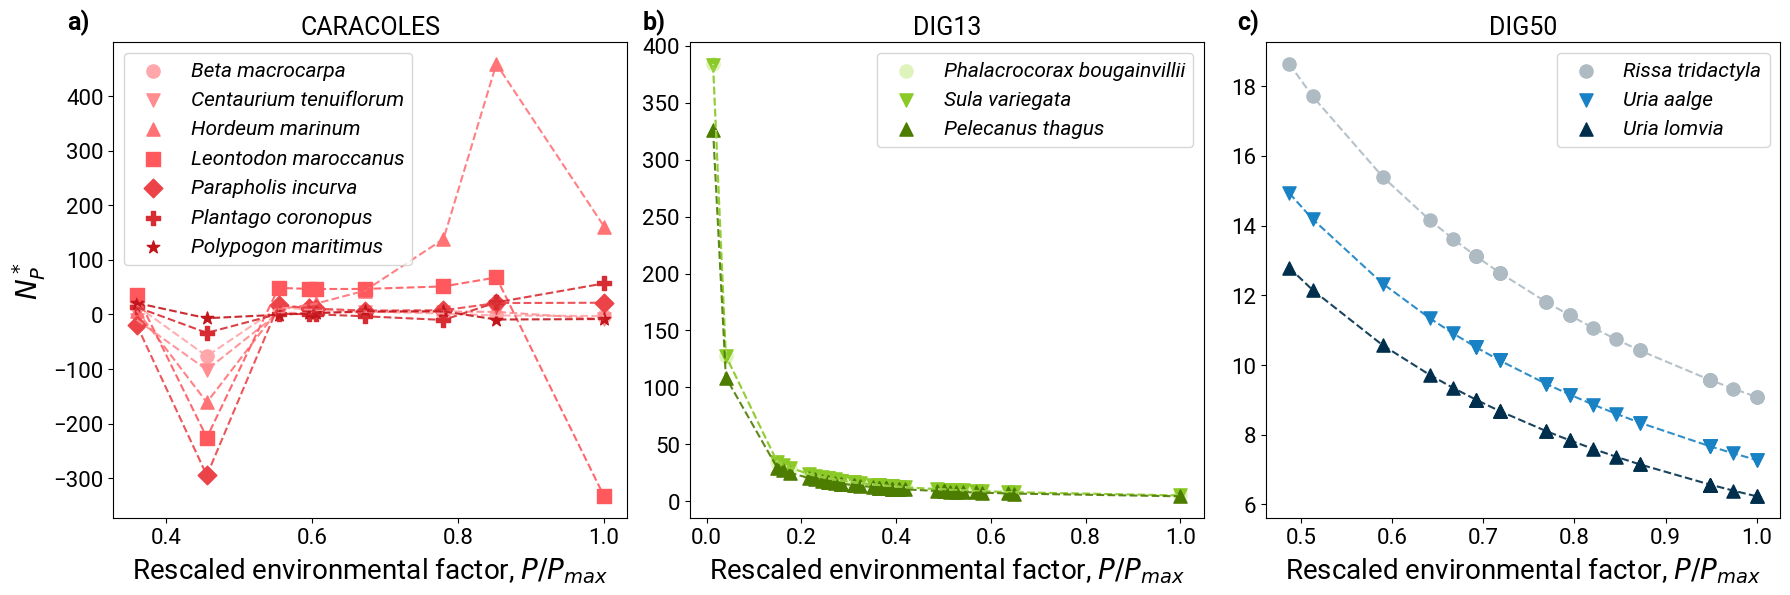

In [173]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# === Crear gradientes personalizados ===
caracoles_cmap = LinearSegmentedColormap.from_list(
    'caracoles_gradient', ['#FFA7AA', '#ff595e', '#C3161C'], N=7
)
dig13_cmap = LinearSegmentedColormap.from_list(
    'dig13_gradient', ['#DFF3BD', '#8ac926', '#4C7C00'], N=3
)
dig50_cmap = LinearSegmentedColormap.from_list(
    'dig50_gradient', ['#AEBBC3', '#1982C4', '#002F4D'], N=3
)

# === Datos ===
datasets = ['CARACOLES', 'DIG13', 'DIG50']
n_species = [7, 3, 3]

# Nombres de especies (puedes cambiarlos por los reales si los tienes)
caracoles_names = ['Beta macrocarpa', 'Centaurium tenuiflorum', 'Hordeum marinum', 'Leontodon maroccanus',
                   'Parapholis incurva', 'Plantago coronopus', 'Polypogon maritimus']
dig13_names = ['Phalacrocorax bougainvillii', 'Sula variegata', 'Pelecanus thagus']
dig50_names = ['Rissa tridactyla', 'Uria aalge', 'Uria lomvia']

# Marcadores
markers = ['o', 'v', '^', 's', 'D', 'P', '*']

# Crear figura
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
axes = axes.flatten()

# Letras A, B, C
fig.text(0.04, 0.95, 'a)', fontsize=18, fontweight='bold')
fig.text(0.36, 0.95, 'b)', fontsize=18, fontweight='bold')
fig.text(0.69, 0.95, 'c)', fontsize=18, fontweight='bold')

for i, name in enumerate(datasets):
    print(i, name)
    ax = axes[i]
    species_count = n_species[i]
    
    # Asignar cmap y nombres
    if name == 'CARACOLES':
        cmap = caracoles_cmap
        names_list = caracoles_names
    elif name == 'DIG13':
        cmap = dig13_cmap
        names_list = dig13_names
    elif name == 'DIG50':
        cmap = dig50_cmap
        names_list = dig50_names
    
    for j in range(1, species_count + 1):
        df = pd.read_csv(f'correlation_NP_{name}_e{j}.csv', sep=' ')
        df = df.sort_values(by='P')
        N = df['#N'].to_numpy()
        P_scaled = df['P'].to_numpy()
        
        color = cmap((j - 1) / (species_count - 1))
        ax.plot(P_scaled, N, ls='--', color=color, alpha=0.9)
        ax.scatter(P_scaled, N, label=names_list[j - 1], color=color,
                   s=90, marker=markers[(j - 1) % len(markers)])

    ax.set_title(name, fontsize=18)
    ax.set_xlabel('Rescaled environmental factor, $P/P_{max}$', fontsize=20)
    if i == 0:
        ax.set_ylabel('$N^*_P$', fontsize=20)
    ax.tick_params(labelsize=16)
    ax.legend(prop={'style':'italic','size':15}, loc='best')

plt.tight_layout()
plt.savefig('leo_figure-supplementary.pdf', dpi=300)
plt.show()


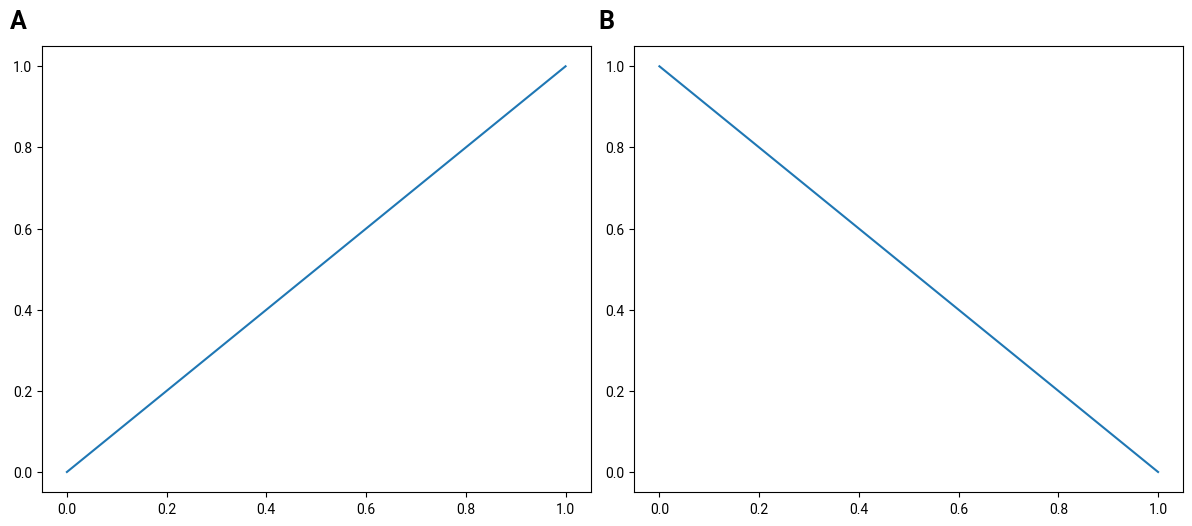

In [56]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Ejemplo de contenido
axes[0].plot([0, 1], [0, 1])
axes[1].plot([0, 1], [1, 0])

# Colocar la letra 'A' en la esquina superior izquierda del primer subplot
fig.text(0.01, 1.005, 'A', fontsize=18, fontweight='bold')  # (x, y) en coordenadas de figura

# Colocar la letra 'B' en la esquina superior izquierda del segundo subplot
fig.text(0.5, 1.005, 'B', fontsize=18, fontweight='bold')

plt.tight_layout()
plt.show()


### Vítor and Javi final results

/tmp/ipykernel_56387/160501104.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_inset.set_xticklabels(ax_inset.get_xticklabels(), rotation=25, ha='center')
/tmp/ipykernel_56387/160501104.py:106: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


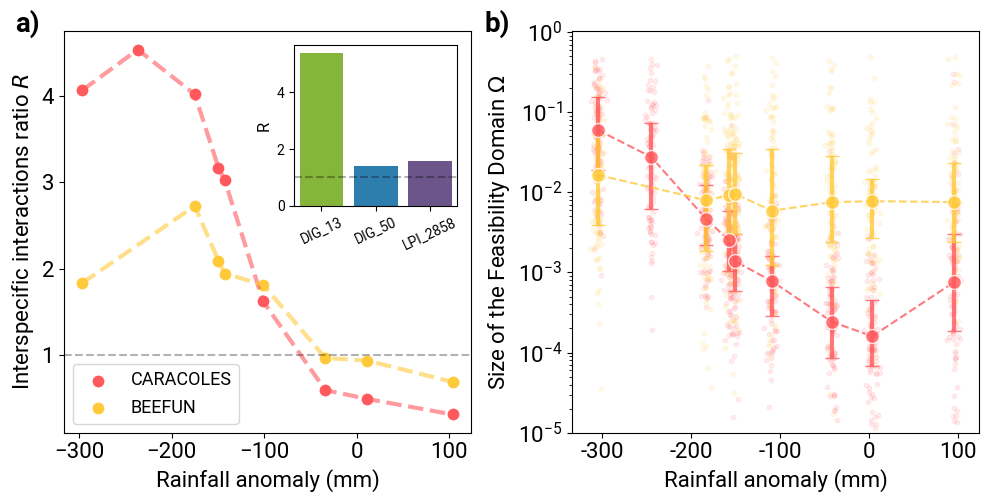

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

mpl.rcParams['font.family'] = 'Roboto'

dataset_names = ['CARACOLES', 'BEEFUN', 'DIG_13', 'DIG_50', 'LPI_2858']
color_palette = ['#ff595e', '#ffca3a', '#8ac926', '#1982c4', '#6a4c93']
markers = ['o', 'v', 'x', 's', 'D']

# === Combinar los datos para el inset ===
dfcomb = pd.DataFrame()

for i, dataset in enumerate(dataset_names[2:]):
    df = pd.read_csv(f'ratio_{dataset}.csv')
    df = df.drop(columns='Unnamed: 0')
    df = df.sort_values(by='norm_env_factor')
    df['dataset'] = [dataset]*df.shape[0]
    dfcomb = pd.concat([dfcomb, df])

dfcomb = dfcomb.groupby('dataset').mean().reset_index()

# === Preparar datos para eje x ===
name = 'BEEFUN'
P = pd.read_csv('complexity72h-2025/data/'+name+'/env.csv')
P = P.drop(columns=['Unnamed: 0'], errors='ignore').to_numpy().transpose()[0]

Plabels = pd.read_csv('complexity72h-2025/data/'+name+'/rainfall_anomaly.csv')
Plabels = Plabels.drop(columns=['Unnamed: 0'], errors='ignore').to_numpy().transpose()[0]

# === Crear figura ===
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# === SUBPLOT A ===
plt.sca(axs[0])
for i, dataset in enumerate(dataset_names[:2]):
    df = pd.read_csv(f'ratio_{dataset}.csv')
    df = df.drop(columns='Unnamed: 0')
    df = df.sort_values(by='norm_env_factor')
    plt.plot(df['env_factor'], df['pos_neg_ratio'], color=color_palette[i], ls='--', lw=3, alpha=0.6)
    plt.scatter(df['env_factor'], df['pos_neg_ratio'], edgecolors='white', s=90, color=color_palette[i],label=f'{dataset_names[i]}')

plt.legend(fontsize=13, loc='lower left')
plt.axhline(1, ls='--', color='black', alpha=0.3)
plt.xlabel('Rainfall anomaly (mm)', fontsize=16)
plt.ylabel('Interspecific interactions ratio $R$', fontsize=16)
plt.tick_params(labelsize=16)

# Inset
ax_inset = inset_axes(axs[0], width="40%", height="40%", loc='upper right', borderpad=1)
sns.barplot(data=dfcomb, x='dataset', y='pos_neg_ratio', ax=ax_inset, hue='dataset',
            palette={'DIG_13':'#8ac926','DIG_50':'#1982c4','LPI_2858':'#6a4c93'})
ax_inset.axhline(1, ls='--', color='black', alpha=0.3)
ax_inset.set_xlabel('')
ax_inset.set_ylabel('R', fontsize=12)
ax_inset.tick_params(labelsize=10)
ax_inset.set_xticklabels(ax_inset.get_xticklabels(), rotation=25, ha='center')
#ax_inset.legend_.remove()

# === SUBPLOT B ===
plt.sca(axs[1])
for i, dataset in enumerate(dataset_names[:2]):
    df = pd.read_csv(f'erroprop_{dataset}.csv')
    df = df.drop(columns='Unnamed: 0')

    for replica_id, group in df.groupby('replica'):
        jitter = np.random.normal(loc=0, scale=3, size=len(group))
        plt.scatter(group['env'] + jitter, group['value'],
                   color=color_palette[i], alpha=0.1, s=10)

    stats_df = df.groupby("env")["value"].agg(
        median='median',
        q1=lambda x: x.quantile(0.25),
        q3=lambda x: x.quantile(0.75)
    ).reset_index()

    lower_err = np.maximum(stats_df['median'] - stats_df['q1'], 0)
    upper_err = np.maximum(stats_df['q3'] - stats_df['median'], 0)

    plt.errorbar(stats_df['env'], stats_df['median'],
                 yerr=[lower_err, upper_err],
                 fmt='o',
                 color=color_palette[i],
                 ecolor=color_palette[i], elinewidth=3, capsize=5,
                 markersize=10, label=f'{dataset}', linestyle='--', alpha=0.8,
                 markeredgecolor='white')

plt.xlabel('Rainfall anomaly (mm)', fontsize=16)
plt.ylabel('Size of the Feasibility Domain '+r'$\Omega$', fontsize=16)
plt.yscale('log')
plt.ylim(bottom=1e-5)
plt.tick_params(labelsize=16)
plt.xticks(
    ticks=np.round(np.linspace(np.min(P), np.max(P), 5), -1),
    labels=np.round(np.linspace(np.min(Plabels), np.max(Plabels), 5), -1).astype(int)
)


# === Añadir letras A y B en la figura ===
fig.text(0.02, 0.95, 'a)', fontsize=20, fontweight='bold')
fig.text(0.49, 0.95, 'b)', fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig('vitor-and-javi.pdf')
plt.show()


/tmp/ipykernel_56387/1991186612.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_56387/1991186612.py:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_inset.set_xticklabels(ax_inset.get_xticklabels(), rotation=25, ha='center')
/tmp/ipykernel_56387/1991186612.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


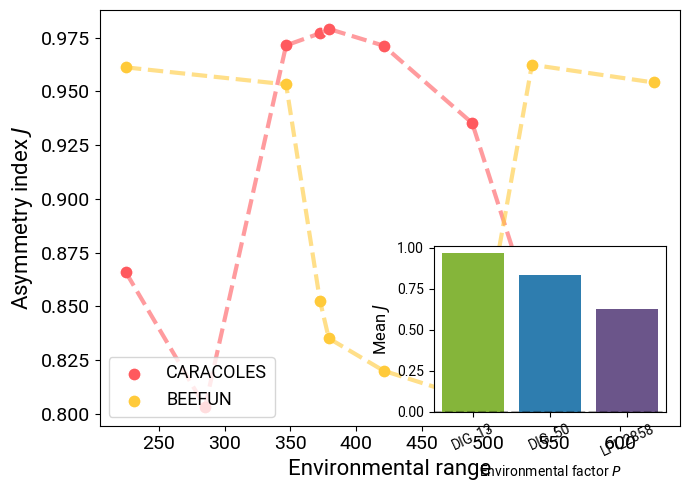

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib as mpl

# Configurar fuente
mpl.rcParams['font.family'] = 'Roboto'

# === Datos base ===
dataset_names = ['CARACOLES', 'BEEFUN', 'DIG_13', 'DIG_50', 'LPI_2858']
color_palette = ['#ff595e', '#ffca3a', '#8ac926', '#1982c4', '#6a4c93']

# === Leer CSV con índices de asimetría ===
df_asym = pd.read_csv('assimetry_indexes.csv')

# === Leer y combinar datos de los barplots ===
dfcomb = pd.DataFrame()
for dataset in dataset_names[2:]:
    df_temp = pd.read_csv(f'ratio_{dataset}.csv').drop(columns='Unnamed: 0', errors='ignore')
    df_temp = df_temp.sort_values(by='norm_env_factor')
    df_temp['dataset'] = dataset
    dfcomb = pd.concat([dfcomb, df_temp])

dfcomb = dfcomb.groupby('dataset').mean(numeric_only=True).reset_index()

# === Función para convertir strings a arrays de floats ===
def parse_array(array_str):
    return np.array([float(num) for num in re.findall(r"[-+]?\d*\.\d+|\d+", array_str)])

# === Crear figura y ejes ===
fig, ax = plt.subplots(figsize=(7, 5))

# === Graficar CARACOLES y BEEFUN ===
for i, name in enumerate(dataset_names[:2]):
    env_range = parse_array(df_asym.loc[0, name])
    J_full = parse_array(df_asym.loc[1, name])
    J_values = J_full[1::2]

    # Ordenar
    sorted_idx = np.argsort(env_range)
    env_sorted = env_range[sorted_idx]
    J_sorted = J_values[sorted_idx]

    # Graficar línea + puntos
    ax.plot(env_sorted, J_sorted, linestyle='--', linewidth=3, alpha=0.6, color=color_palette[i])
    ax.scatter(env_sorted, J_sorted, s=90, edgecolors='white', color=color_palette[i], label=name)

# === Estética del gráfico principal ===
ax.set_xlabel('Environmental range', fontsize=16)
ax.set_ylabel('Asymmetry index $J$', fontsize=16)
ax.tick_params(labelsize=14)
#ax.axhline(0, ls='--', color='black', alpha=0.3)
ax.legend(fontsize=13, loc='lower left')

# === Inset: barplot con pos_neg_ratio para los otros datasets ===
# === Crear Inset: barplot con valores de J promedio para CARACOLES y BEEFUN ===
J_means = []
for name in dataset_names[2:]:  # Solo los tres últimos
    J_full = parse_array(df_asym.loc[1, name])
    J_values = J_full[1::2]  # Extraer solo valores de J
    J_mean = np.mean(J_values)
    J_means.append({'dataset': name, 'J_mean': J_mean})

df_inset = pd.DataFrame(J_means)

# Crear el inset barplot
ax_inset = inset_axes(ax, width="40%", height="40%", loc='lower right', borderpad=1)
sns.barplot(
    data=df_inset,
    x='dataset',
    y='J_mean',
    palette={'DIG_13': '#8ac926', 'DIG_50': '#1982c4', 'LPI_2858': '#6a4c93'},
    ax=ax_inset
)
ax_inset.axhline(0, ls='--', color='black', alpha=0.3)
ax_inset.set_ylabel('Mean $J$', fontsize=12)
ax_inset.set_xlabel('Environmental factor $P$')
ax_inset.tick_params(labelsize=10)
ax_inset.set_xticklabels(ax_inset.get_xticklabels(), rotation=25, ha='center')

#ax_inset.set_xticklabels(ax_inset.get_xticklabels(), rotation=25, ha='center')
#ax_inset.legend_.remove()  # Quita leyenda dentro del inset

# === Mostrar figura ===
plt.tight_layout()
plt.show()


/tmp/ipykernel_56387/2525150141.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_56387/2525150141.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_bar.set_xticklabels(ax_bar.get_xticklabels(), rotation=25, ha='center')


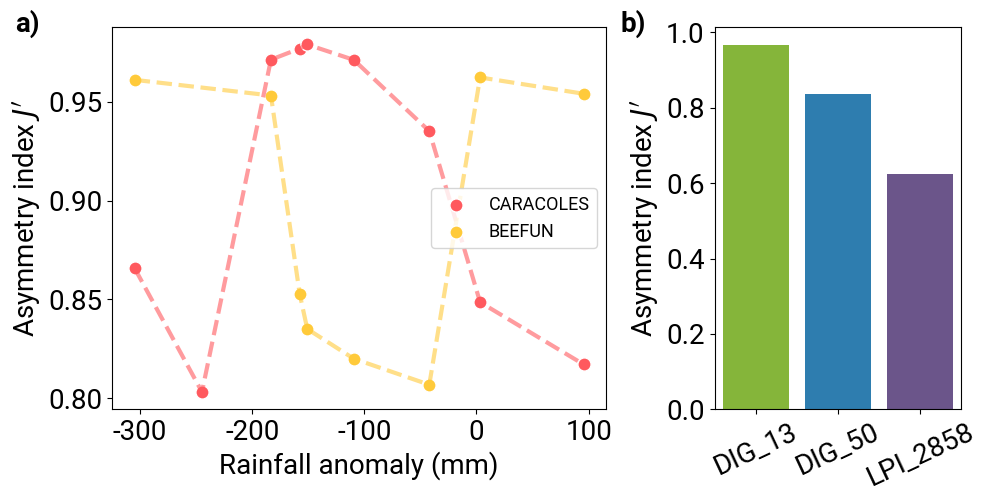

In [161]:
# === Crear figura con dos subplots: principal + barplot ===
fig, (ax_main, ax_bar) = plt.subplots(
    ncols=2, figsize=(10, 5), gridspec_kw={'width_ratios': [2, 1]}
)
fig.text(0.02, 0.95, 'a)', fontsize=20, fontweight='bold')
fig.text(0.625, 0.95, 'b)', fontsize=20, fontweight='bold')
# === Gráfico principal con CARACOLES y BEEFUN ===
for i, name in enumerate(dataset_names[:2]):
    env_range = parse_array(df_asym.loc[0, name])
    J_full = parse_array(df_asym.loc[1, name])
    J_values = J_full[1::2]

    sorted_idx = np.argsort(env_range)
    env_sorted = env_range[sorted_idx]
    J_sorted = J_values[sorted_idx]

    ax_main.plot(env_sorted, J_sorted, linestyle='--', linewidth=3, alpha=0.6, color=color_palette[i])
    ax_main.scatter(env_sorted, J_sorted, s=90, edgecolors='white', color=color_palette[i], label=name)
    #ax_main.tick_params(labelsize=20)

# Estética del gráfico principal
ax_main.set_xlabel('Rainfall anomaly (mm)', fontsize=20)
ax_main.set_ylabel('Asymmetry index $J\'$', fontsize=20)
ax_main.tick_params(labelsize=20)
ax_main.legend(fontsize=13, loc='center right')

Plabels = pd.read_csv('complexity72h-2025/data/'+name+'/rainfall_anomaly.csv')
Plabels = Plabels.drop(columns=['Unnamed: 0'], errors='ignore').to_numpy().transpose()[0]

ax_main.set_xticks(
    ticks=np.round(np.linspace(np.min(env_sorted), np.max(env_sorted), 5), -1),
    labels=np.round(np.linspace(np.min(Plabels), np.max(Plabels), 5), -1).astype(int)
)


# === Barplot: promedio de J para los otros datasets ===
J_means = []
for name in dataset_names[2:]:
    J_full = parse_array(df_asym.loc[1, name])
    J_values = J_full[1::2]
    J_mean = np.mean(J_values)
    J_means.append({'dataset': name, 'J_mean': J_mean})

df_bar = pd.DataFrame(J_means)

sns.barplot(
    data=df_bar,
    x='dataset',
    y='J_mean',
    palette={'DIG_13': '#8ac926', 'DIG_50': '#1982c4', 'LPI_2858': '#6a4c93'},
    ax=ax_bar
)

#ax_bar.axhline(0, ls='--', color='black', alpha=0.3)
ax_bar.set_ylabel('Asymmetry index $J\'$', fontsize=20)
ax_bar.set_xlabel('', fontsize=20)
ax_bar.tick_params(labelsize=20)
ax_bar.set_xticklabels(ax_bar.get_xticklabels(), rotation=25, ha='center')

# === Ajustar y mostrar ===
plt.tight_layout()
plt.savefig('emile.pdf')
plt.show()
